In [1]:
#AUTOENCODER  

import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Load dataset
data = load_breast_cancer()  # 569 samples × 30 features
X = data.data

# Normalize data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Build AutoEncoder
input_layer = Input(shape=(X_scaled.shape[1],))  # X_scaled.shape[1] = 30Input vector = 30 features

# Encoder
encoded = Dense(15, activation='relu')(input_layer)  # 30 Original features,Dense 15 First compression
encoded = Dense(7, activation='relu')(encoded)  # Dense 7 Final compressed (latent space)

# The encoder learns what to keep

# The decoder learns how to rebuild

# Decoder
decoded = Dense(15, activation='relu')(encoded)
decoded = Dense(X_scaled.shape[1], activation='sigmoid')(decoded)  # X_scaled, dataset, shape[1], shape(row0,column1), decoded,Take those 15 values and pass them into this Dense layer

# Model
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Summary
autoencoder.summary()  # Layer names,Output shape of each layer, Number of trainable parameters

# Train
autoencoder.fit(
    X_scaled, X_scaled,  # autoencoder.fit(INPUT, TARGET), INPUT  = X_scaled,TARGET = X_scaled
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Encoder model (compressed data)
encoder = Model(inputs=input_layer, outputs=encoded)  # Takes the same input (30 features),Outputs the encoded (7-dimensional) vector
compressed_data = encoder.predict(X_scaled)  # X_scaled.shape        → (569, 30),compressed_data.shape → (569, 7)

# Reconstruction
reconstructed_data = autoencoder.predict(X_scaled)

print("Original shape     :", X_scaled.shape)
print("Compressed shape   :", compressed_data.shape)
print("Reconstructed shape:", reconstructed_data.shape)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 15)                  │             465 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 15)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 30)                  │             480 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,177 (4.60 KB)

 Trainable params: 1,177 (4.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0969 - val_loss: 0.0960
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0911 - val_loss: 0.0874
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0795 - val_loss: 0.0737
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0673 - val_loss: 0.0560
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0513 - val_loss: 0.0408
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0413 - val_loss: 0.0321
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0319 - val_loss: 0.0276
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0302 - val_loss: 0.0256
Epoch 9/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0273 - val_loss: 0.0236
Epoch 10/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0259 - val_loss: 0.0219
Epoch 11/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0230 - val_loss: 0.0205
Epoch 12/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0225 - val_l

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.0960 - val_loss: 0.0981
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0930 - val_loss: 0.0912
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0834 - val_loss: 0.0793
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0726 - val_loss: 0.0631
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0563 - val_loss: 0.0470
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0433 - val_loss: 0.0361
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0348 - val_loss: 0.0300
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0321 - val_loss: 0.0272
Epoch 9/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0288 - val_loss: 0.0253
Epoch 10/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0264 - val_loss: 0.0236
Epoch 11/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0254 - val_loss: 0.0224
Epoch 12/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0

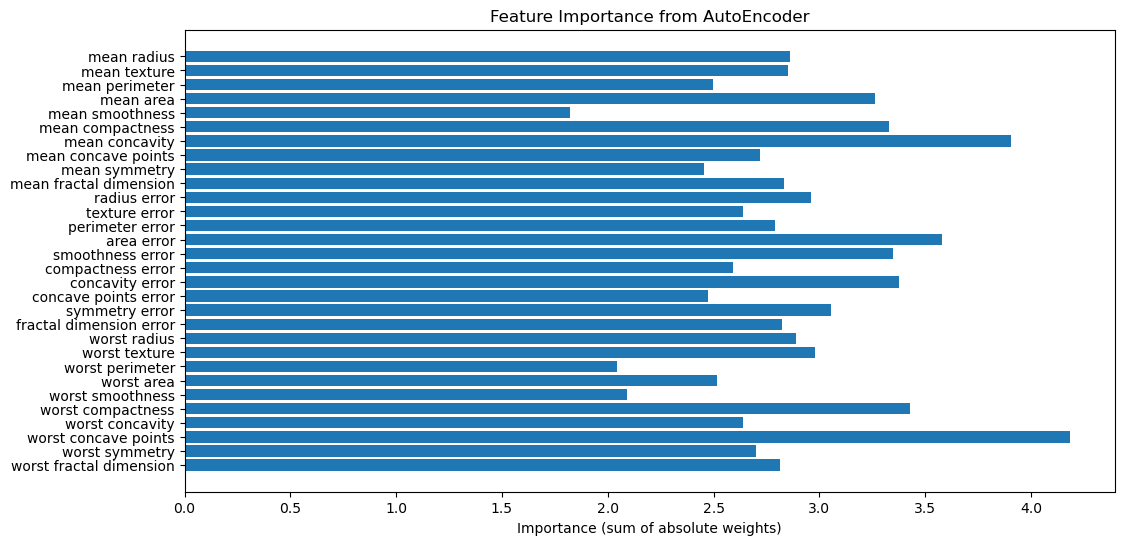

In [5]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# 1️ Load dataset
data = load_breast_cancer()
X = data.data
feature_names = data.feature_names

# Normalize data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 3️ Build AutoEncoder
input_layer = Input(shape=(X_scaled.shape[1],))

# Encoder
encoded = Dense(15, activation='relu')(input_layer)
encoded = Dense(7, activation='relu')(encoded)

# Decoder
decoded = Dense(15, activation='relu')(encoded)
decoded = Dense(X_scaled.shape[1], activation='sigmoid')(decoded)

# AutoEncoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train AutoEncoder
autoencoder.fit(
    X_scaled, X_scaled,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Encoder-only model (compressed data)
encoder = Model(inputs=input_layer, outputs=encoded)
compressed_data = encoder.predict(X_scaled)

# Reconstruction
reconstructed_data = autoencoder.predict(X_scaled)

print(f"Original shape     : {X_scaled.shape}")
print(f"Compressed shape   : {compressed_data.shape}")
print(f"Reconstructed shape: {reconstructed_data.shape}")

# Compute feature importance from first encoder layer
weights, biases = autoencoder.layers[1].get_weights()  # 30 -> 15 layer
feature_importance = np.sum(np.abs(weights), axis=1)   # sum absolute weights
important_idx = np.argsort(feature_importance)[::-1]   # descending
important_features = feature_names[important_idx]

#  Display top 10 important features
print("\nTop 10 important features:")
for i, f in enumerate(important_features[:10]):
    print(f"{i+1}. {f} (score={feature_importance[important_idx[i]]:.4f})")

#  Plot feature importance
plt.figure(figsize=(12,6))
plt.barh(feature_names, feature_importance)
plt.xlabel("Importance (sum of absolute weights)")
plt.title("Feature Importance from AutoEncoder")
plt.gca().invert_yaxis()
plt.show()


In [3]:
import pandas as pd

In [4]:
import sklearn

In [6]:
from sklearn.datasets import load_breast_cancer

In [7]:
b=("load_breast_cancer")

In [ ]:
featyuers compress, most import featuers konse hai batao

In [ ]:
pd.read_csv